In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tasks and their filename suffixes
tasks = {
    "Ball lifting": "15_2110",
    "Tray moving": "10_1900",
    "Handover": "10_2207"
}

data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
batch_sizes = range(250, 1751, 250)

# Container for results
results = {task: {"success": [], "time_mean": [], "time_std": [], "comp_mean": [], "comp_std": []}
           for task in tasks}


In [2]:
for task, suffix in tasks.items():
    results[task] = {"success": [], "time_mean": [], "time_std": [], "comp_mean": [], "comp_std": []}
    
    for batch_size in batch_sizes:
        file_name = f"bench_{batch_size}_{suffix}.npz"
        file_path = data_path + file_name

        try:
            data = np.load(file_path, allow_pickle=True)
        except FileNotFoundError:
            print(f"⚠️ Missing file: {file_path}")
            continue

        # ✅ Success rate
        success = np.array(data['success'][1:], dtype=bool)
        success_rate = 100 * np.mean(success)
        results[task]["success"].append(success_rate)

        # ✅ Task time (only successful runs)
        task_time = np.array(data['total_time'][1:])[success]
        results[task]["time_mean"].append(np.mean(task_time))
        results[task]["time_std"].append(np.std(task_time))

        # ✅ Computation time
        comp_time = np.concatenate(data['step_time'][1:])
        results[task]["comp_mean"].append(np.mean(comp_time[1:]))
        results[task]["comp_std"].append(np.std(comp_time[1:]))


In [3]:
print("file_name", file_name)

file_name bench_1750_10_2207.npz


In [4]:
# for task, suffix in tasks.items():
#     for batch_size in batch_sizes:
#         file_name = f"bench_{batch_size}_{suffix}.npz"
#         data = np.load(data_path + file_name, allow_pickle=True)

#         # Success rate
#         success = np.array(data['success'][1:], dtype=bool)
#         success_rate = 100 * np.mean(success)
#         results[task]["success"].append(success_rate)

#         # Task time (only successful runs)
#         task_time = np.array(data['total_time'][1:])[success]
#         results[task]["time_mean"].append(np.mean(task_time))
#         results[task]["time_std"].append(np.std(task_time))

#         # Computation time from step_time
#         comp_time = np.concatenate(data['step_time'][1:])
#         results[task]["comp_mean"].append(np.mean(comp_time[1:]))
#         results[task]["comp_std"].append(np.std(comp_time[1:]))


In [5]:
for task in tasks:
    for metric in ["success", "time_mean", "comp_mean"]:
        print(task, metric, len(results[task][metric]), len(batch_sizes))


Ball lifting success 7 7
Ball lifting time_mean 7 7
Ball lifting comp_mean 7 7
Tray moving success 7 7
Tray moving time_mean 7 7
Tray moving comp_mean 7 7
Handover success 7 7
Handover time_mean 7 7
Handover comp_mean 7 7


In [6]:
print("Available tasks:", list(results.keys()))
# Passing Cube

# task_name = "Ball lifting"
task_name = "Handover"
metric = "success"

print("Batch Size  Success Rate (%)")
for bs, val in zip(batch_sizes, results[task_name][metric]):
    print(f"{bs:>8}  {val:>14.2f}")

Available tasks: ['Ball lifting', 'Tray moving', 'Handover']
Batch Size  Success Rate (%)
     250           80.00
     500           90.00
     750           70.00
    1000           75.00
    1250           85.00
    1500           85.00
    1750           95.00


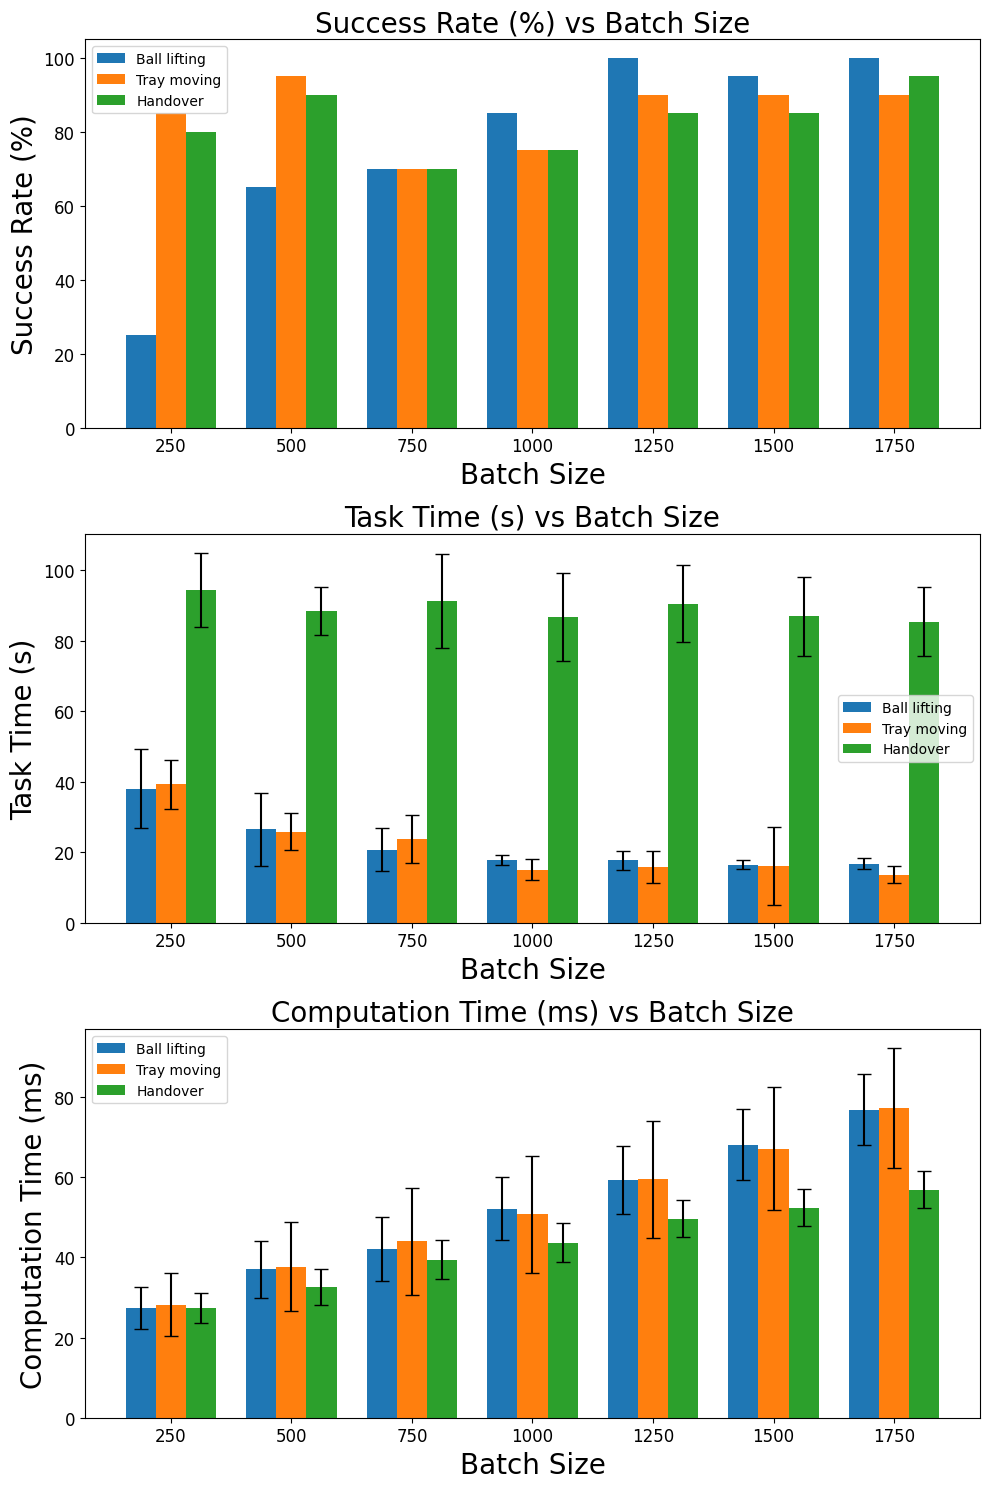

In [7]:
x = np.arange(len(batch_sizes))
width = 0.25
f_s = 20

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

metrics = [
    ("success", "Success Rate (%)", None),
    ("time_mean", "Task Time (s)", "time_std"),
    ("comp_mean", "Computation Time (ms)", "comp_std")
]

for ax, (metric, ylabel, err_key) in zip(axs, metrics):
    for i, task in enumerate(tasks):
        means = results[task][metric]
        stds = results[task][err_key] if err_key else None
        ax.bar(x + i*width, means, width, yerr=stds, label=task, capsize=5)

    ax.set_xlabel("Batch Size", fontsize=f_s)
    ax.set_ylabel(ylabel, fontsize=f_s)
    ax.set_title(f"{ylabel} vs Batch Size", fontsize=f_s)
    ax.set_xticks(x + width)
    ax.set_xticklabels(batch_sizes)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend()

plt.tight_layout()
plt.show()


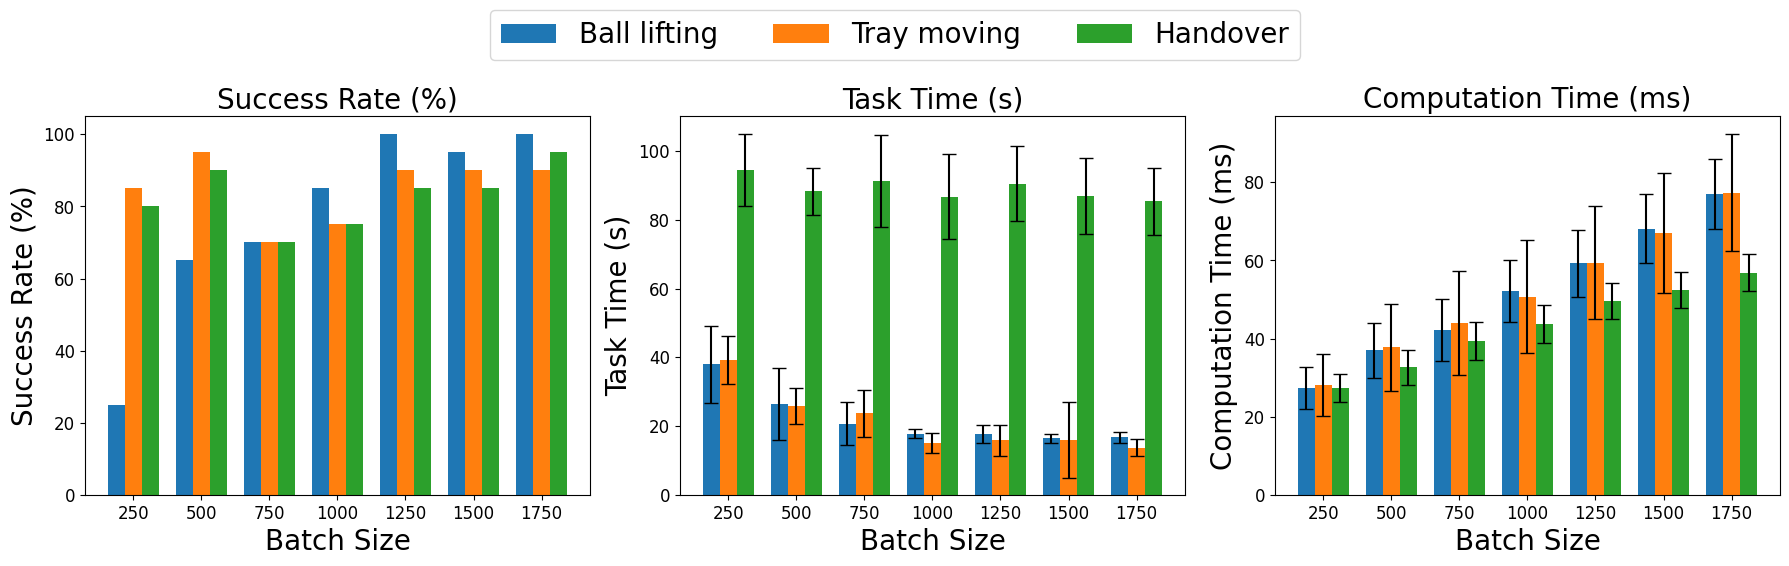

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for ax, (metric, ylabel, err_key) in zip(axs, metrics):
    for i, task in enumerate(tasks):
        means = results[task][metric]
        stds = results[task][err_key] if err_key else None
        ax.bar(x + i*width, means, width, yerr=stds, label=task, capsize=5)

    ax.set_xlabel("Batch Size", fontsize=f_s)
    ax.set_ylabel(ylabel, fontsize=f_s)
    ax.set_title(f"{ylabel}", fontsize=f_s)
    ax.set_xticks(x + width)
    ax.set_xticklabels(batch_sizes)
    ax.tick_params(axis='both', labelsize=12)

# Use a single legend for all metrics
# axs[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.legend(
    labels=tasks.keys(),
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),  # move further up
    ncol=len(tasks),
    fontsize=f_s
)

# Make room for legend
plt.tight_layout(rect=[0, 0, 1, 0.9])  # adjust top to leave space for legend
plt.tight_layout()
plt.show()
